In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


In [ ]:
df = pd.read_csv("advertising.csv")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


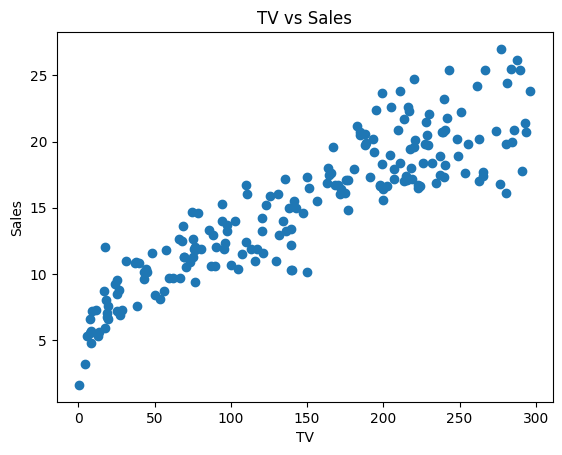

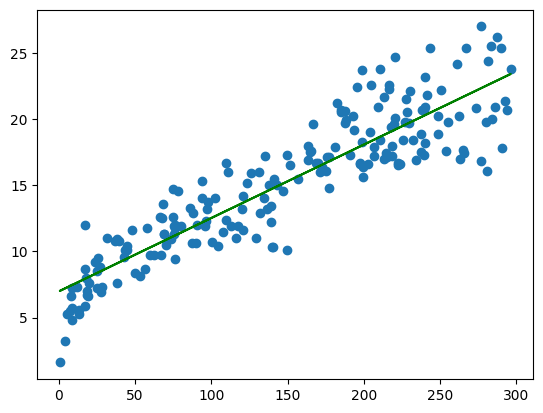

In [ ]:
X = df["TV"]
Y = df["Sales"]
plt.scatter(df["TV"],df["Sales"])
plt.title("TV vs Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()


import numpy as np
m, b = np.polyfit(X, Y, 1)  # linear fit
plt.scatter(X, Y)
plt.plot(X, m*np.array(X) + b, color='green')  # add trend line
plt.show()

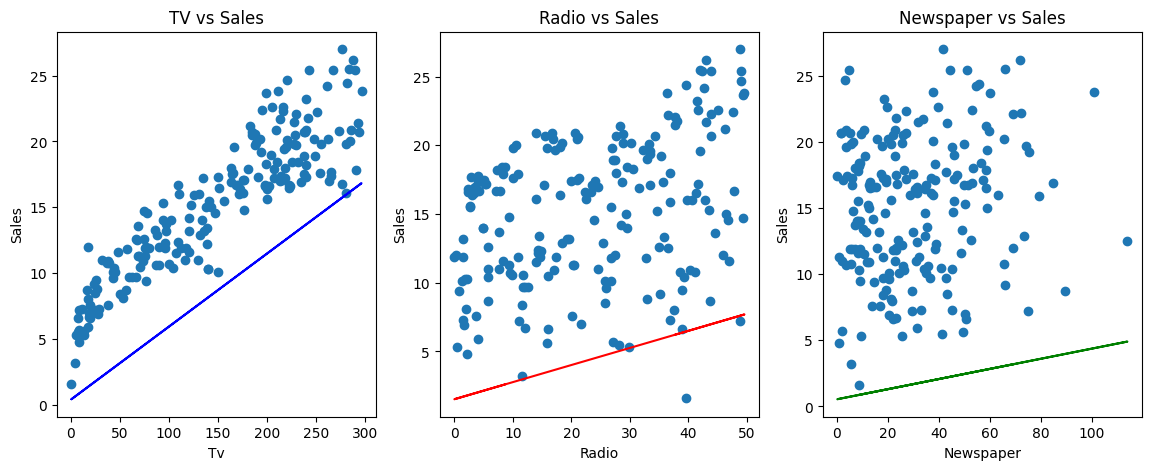

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
m,b = np.polyfit(df["TV"],df["Sales"],1)
plt.scatter(df["TV"],df["Sales"])
plt.plot(df["TV"],m*np.array(df["TV"]+b),color="blue")
plt.title("TV vs Sales")
plt.xlabel("Tv")
plt.ylabel("Sales")

plt.subplot(1,3,2)
m1,b1 = np.polyfit(df["Radio"],df["Sales"],1)
plt.scatter(df["Radio"],df["Sales"])
plt.plot(df["Radio"],m1*np.array(df["Radio"]+ b1),color="red")
plt.title("Radio vs Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")


plt.subplot(1,3,3)
m2, b2 = np.polyfit(df["Newspaper"],df["Sales"],1)
plt.scatter(df["Newspaper"],df["Sales"])
plt.plot(df["Newspaper"],m2*np.array(df["Newspaper"] + b2),color ="green")
plt.title("Newspaper vs Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

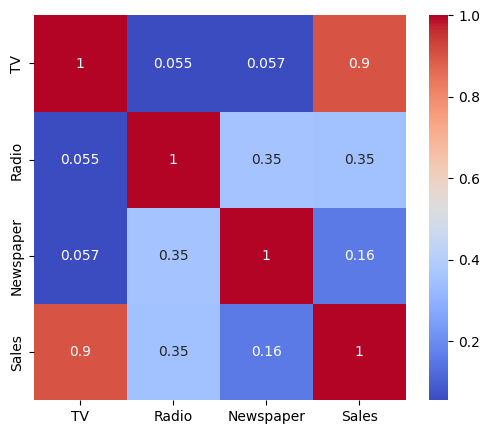

In [ ]:
cor = df.corr()
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
x = df[["TV","Radio","Newspaper"]]
y = df["Sales"]
print(x.shape)
print(y.shape)
print(y.max() - y.min())

(200, 3)
(200,)
25.4


In [ ]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
x_scale = standard.fit_transform(x)
#y_scale = standard.fit_transform(y) # to scale if y then reshape it as (-1,1)

In [ ]:
x_tensor = torch.tensor(x_scale,dtype=torch.float32)
y_tensor = torch.tensor(y.values,dtype=torch.float32).view(-1,1) # view is similar to  reshape in numpy

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_tensor,y_tensor,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([160, 3])
torch.Size([160, 1])


In [ ]:
model = nn.Linear(in_features=3,out_features=1)
Loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)


In [ ]:
epochs = 1500

for epoch in range(epochs):

  y_pred = model(x_train)

  #plt.scatter(x_train[:,0].detach(),y_train.detach(),color="blue")
  #plt.plot(x_train[:,0].detach(),y_pred.detach(),color="red")
  #plt.title(f"{epoch}updating of parameter")
  #plt.xlabel("x_train")
  #plt.ylabel("y_train")
  #plt.legend()
  #plt.show()

  plt.pause(0.01)

  loss = Loss(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  if epoch % 100 == 0:
    print(f"Loss :- {loss}")


Loss :- 255.134765625
Loss :- 6.9033918380737305
Loss :- 2.7495884895324707
Loss :- 2.677612781524658
Loss :- 2.67618989944458
Loss :- 2.6761457920074463
Loss :- 2.676143169403076
Loss :- 2.676143169403076
Loss :- 2.676142930984497
Loss :- 2.676142930984497
Loss :- 2.676142692565918
Loss :- 2.676142692565918
Loss :- 2.676142930984497
Loss :- 2.676142930984497


In [ ]:
with torch.no_grad():
  y_pred_test = model(x_test)
  loss = Loss(y_pred_test,y_test)
  print(loss)


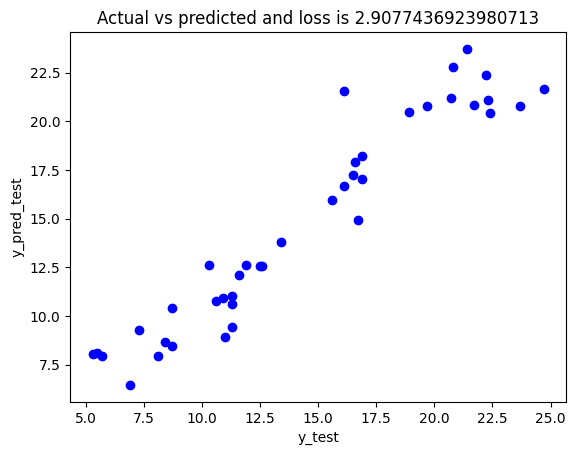

In [ ]:
#plt.scatter(range(len(y_test)),y_test,color="blue")
#plt.scatter(range(len(y_pred_test)),y_pred_test,color="red")
#plt.figure(figsize=(10,5))

#plt.scatter(x,y_pred_test,color="blue")
#plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],color="red")#
#plt.title(f"Actual vs predicted and loss is {loss}")
#plt.xlabel("y_test")
#plt.ylabel("y_pred_test")
#plt.show()

#plt.scatter(y_test,y_pred_test,c=y_pred_test,cmap="coolwarm")
plt.scatter(y_test,y_pred_test,color="blue")
#plt.scatter(range(len(y_pred_test)),y_pred_test,color="green")
#plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="blue")
plt.title(f"Actual vs predicted and loss is {loss}")
plt.xlabel("y_test")
plt.ylabel("y_pred_test")
plt.show()

In [ ]:
weight = model.weight.data
biases = model.bias.data
print(weight)
print(biases)

tensor([[4.6682, 1.4950, 0.0942]])
tensor([15.2102])


In [ ]:
new_data = torch.tensor([[12.2,33.1,0.11]],dtype=torch.float32)

new_scaled = standard.fit_transform(new_data)
new_data1 = torch.tensor(new_scaled,dtype=torch.float32)
with torch.no_grad():
  new_pred = model(new_data1)
  print(new_pred)

tensor([[15.2102]])


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_test)
print(r2)

0.905901613097675


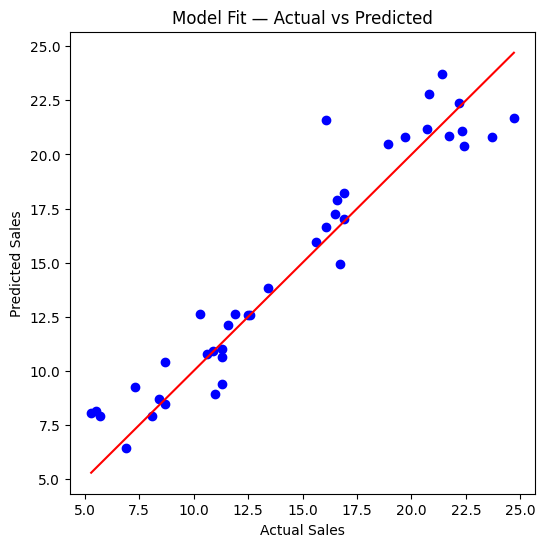

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Model Fit — Actual vs Predicted")
plt.show()